## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction.

**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo

5. Apply a lambda function to segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
6. Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
7. Wrap all of the above into an ETL pipeline.

Extra tasks for practicing GroupBy
1. Join CustomerID with TotalRevenue to create Customer_Revenue column
2. Group by Country to find total revenue, total customers, and average order size per country.
3. Group by StockCode to find top-selling products by quantity.
4. Group by CustomerID to calculate the average order value or frequency of purchases.







             








## 1. Load the dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [2]:
#conda install anaconda::kagglehub
#!pip install kagglehub

In [3]:
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bobby\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [4]:
dataset_path = "C:/Users/Bobby/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1"
# bruger/bobby
files = os.listdir(dataset_path)
print(files)

['online_retail_II.xlsx']


In [5]:
file_path = "C:/Users/Bobby/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1/online_retail_II.xlsx"

df = pd.read_excel(file_path)

## 2. Visualize the dataset and it's structure using appropriate libraries and plots

In [19]:
df.shape

(525461, 8)

In [17]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [16]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [285]:
df["Customer ID"].isna().value_counts()

Customer ID
False    417534
True     107927
Name: count, dtype: int64

In [17]:
df["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [18]:
df["Country"].nunique()

40

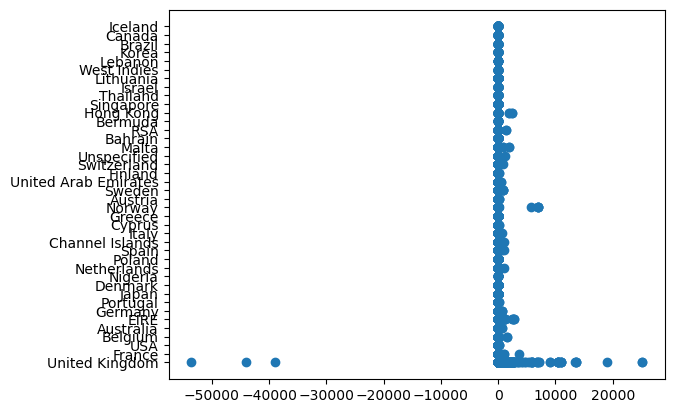

In [19]:
plt.scatter(x = "Price", y = "Country", data = df)

In [55]:
pd.crosstab(df['Country'],df['Price'])

Price,-53594.360,-44031.790,-38925.870,0.000,0.001,0.010,0.030,0.040,0.050,0.060,...,6706.710,6958.170,7044.790,8985.600,10468.800,10953.500,13474.790,13541.330,18910.690,25111.090
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bahrain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bermuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Channel Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df["StockCode"].nunique()

4632

In [73]:
df["StockCode"].unique()

array([85048, '79323P', '79323W', ..., 22935, 22933, 21120], dtype=object)

In [81]:
df["StockCode"].value_counts()

StockCode
85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
90005B       1
90197C       1
90080        1
20904        1
21120        1
Name: count, Length: 4632, dtype: int64

In [79]:
df["StockCode"].describe()

count     525461
unique      4632
top       85123A
freq        3516
Name: StockCode, dtype: object

In [83]:
df["StockCode"].value_counts().describe()

count    4632.000000
mean      113.441494
std       193.402044
min         1.000000
25%        10.000000
50%        42.000000
75%       131.000000
max      3516.000000
Name: count, dtype: float64

In [87]:
# the price is the total, Also there is a difference in Description for this item, also with a minus in quantity

In [85]:
df[df["StockCode"] == "85123A"] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
524412,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom
524519,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain
524733,538145,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom
525223,538157,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-09 16:57:00,2.95,17576.0,United Kingdom


In [107]:
df[df["StockCode"] == "85123A"]["Description"].nunique() # wonder if there are more examples of this

2

In [119]:
df["Description"].nunique() # a few more examples of this yes!

4681

In [117]:
df["StockCode"].nunique()

4632

In [175]:
df.groupby("Invoice")["InvoiceDate"].nunique() # some invoice don't have the same corelated invoiceDate

Invoice
489434     1
489435     1
489436     1
489437     1
489438     1
          ..
C538121    1
C538122    1
C538123    1
C538124    1
C538164    1
Name: InvoiceDate, Length: 28816, dtype: int64

In [173]:
df.groupby("Invoice")["InvoiceDate"].nunique().sum() # there is 28857 invoiceDates but only 28816 different invoices

28857

In [177]:
df.groupby("Invoice")["Country"].nunique() # All invoice has the same country

Invoice
489434     1
489435     1
489436     1
489437     1
489438     1
          ..
C538121    1
C538122    1
C538123    1
C538124    1
C538164    1
Name: Country, Length: 28816, dtype: int64

In [179]:
df.groupby("Invoice")["Country"].nunique().sum()

28816

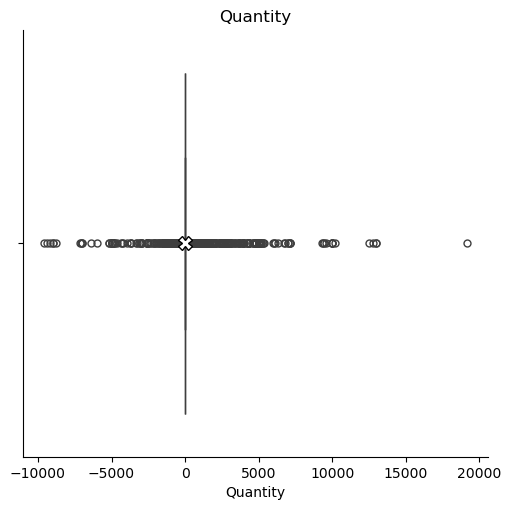

In [123]:
sns.catplot(x="Quantity", data = df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Quantity")
plt.xlabel("Quantity")
plt.show()

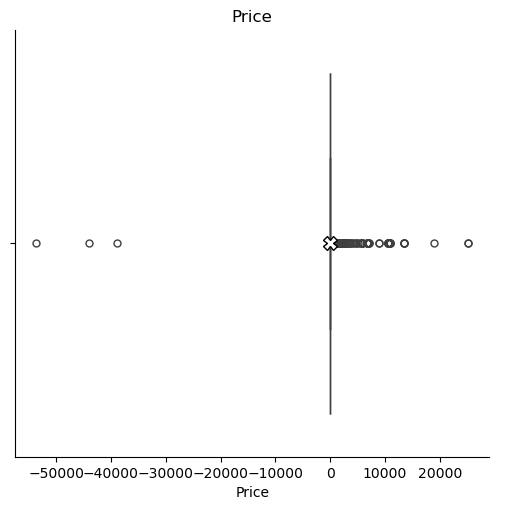

In [124]:
sns.catplot(x="Price", data = df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Price")
plt.xlabel("Price")
plt.show()

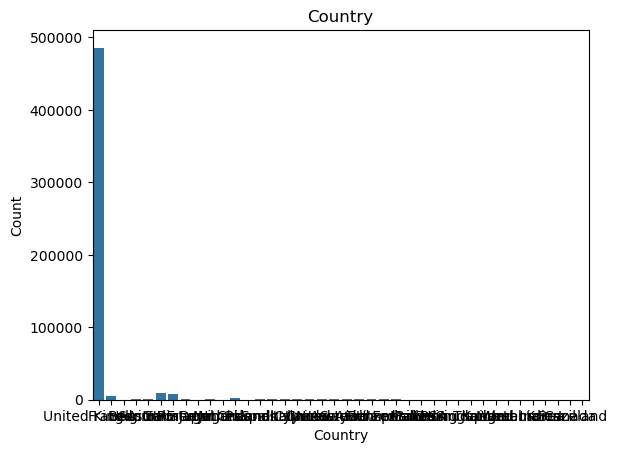

In [53]:
sns.countplot(x = "Country", data = df)
plt.title("Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [20]:
df["Price"].nunique()

1606

In [21]:
df["Price"].value_counts().get(0)

3687

In [22]:
df.groupby('Invoice')[['Price']].sum()

,Price
Invoice,
489434,32.65
489435,10.50
489436,70.88
489437,83.45
489438,44.05
...,...
C538121,12.75
C538122,1.25
C538123,5.40


In [23]:
df.groupby('Invoice')[['Price']].value_counts()

Invoice  Price
489434   1.25     2
         6.75     2
         1.65     1
         2.10     1
         5.95     1
                 ..
C538123  2.10     1
C538124  0.50     1
         2.95     1
         12.75    1
C538164  1.95     1
Name: count, Length: 204490, dtype: int64

In [24]:
df.groupby('Invoice').value_counts()

Invoice  StockCode  Description                         Quantity  InvoiceDate          Price  Customer ID  Country       
489434   21232      STRAWBERRY CERAMIC TRINKET BOX       24       2009-12-01 07:45:00  1.25   13085.0      United Kingdom    1
         21523      FANCY FONT HOME SWEET HOME DOORMAT   10       2009-12-01 07:45:00  5.95   13085.0      United Kingdom    1
         21871      SAVE THE PLANET MUG                  24       2009-12-01 07:45:00  1.25   13085.0      United Kingdom    1
         22041      RECORD FRAME 7" SINGLE SIZE          48       2009-12-01 07:45:00  2.10   13085.0      United Kingdom    1
         22064      PINK DOUGHNUT TRINKET POT            24       2009-12-01 07:45:00  1.65   13085.0      United Kingdom    1
                                                                                                                            ..
C538123  22956      36 FOIL HEART CAKE CASES            -2        2010-12-09 15:41:00  2.10   12605.0      Germany  

In [25]:
df.groupby('Invoice')["StockCode"].nunique()

Invoice
489434      8
489435      4
489436     19
489437     23
489438     17
           ..
C538121     1
C538122     1
C538123     3
C538124     3
C538164     1
Name: StockCode, Length: 28816, dtype: int64

In [26]:
df.groupby('Invoice')["StockCode"].nunique().describe() # one invoice has a mean of 17 stockcodes(17 different items)

count    28816.000000
mean        17.772279
std         34.182193
min          1.000000
25%          1.000000
50%          8.000000
75%         22.000000
max        674.000000
Name: StockCode, dtype: float64

In [27]:
df.groupby('Invoice')[['Price']].mean()

,Price
Invoice,
489434,4.081250
489435,2.625000
489436,3.730526
489437,3.628261
489438,2.591176
...,...
C538121,12.750000
C538122,1.250000
C538123,1.800000


In [28]:
df.groupby('Country')[['Customer ID']].value_counts()

Country      Customer ID
Australia    12415.0        212
             12431.0         84
             12424.0         67
             12389.0         49
             12393.0         48
                           ... 
Unspecified  14265.0         48
             12470.0         23
             12351.0         21
             15357.0          1
West Indies  18140.0         54
Name: count, Length: 4388, dtype: int64

In [29]:
df.groupby('Country')[['Customer ID']].value_counts()

Country      Customer ID
Australia    12415.0        212
             12431.0         84
             12424.0         67
             12389.0         49
             12393.0         48
                           ... 
Unspecified  14265.0         48
             12470.0         23
             12351.0         21
             15357.0          1
West Indies  18140.0         54
Name: count, Length: 4388, dtype: int64

# 3. Do some basic cleaning to handle missing values

## lots of issues
  *   Same stock code has different descriptions
  *   Same invoice has different invoiceDate
  *   Negative prices and quantities
  *   Cancelled Invoices

In [192]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

##### there are 3687 products with the price of 0, this would get rid of a good portion of them

##### also a good portion of them seems to be negative quantitives as well, dobbel bam

In [208]:
df[df["Description"].isna()] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,NaN,United Kingdom
524731,538143,84534B,NaN,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom


In [220]:
df[df["Description"].isna()]["Price"].nunique() # they all share the same price of 0

1

In [222]:
df[df["Description"].isna()]["Customer ID"].nunique()

0

In [72]:
df["Description"].nunique() # amount of products affected with bad values 1920

4681

In [74]:
df["StockCode"].nunique() # amount of products affected with bad values 1920

4632

##### cleaning this alone should do a lot of good

In [11]:
temp = df.copy()
print(temp.isna().sum())

# my argument is that 20% of the data has missing customer id, which is quite a lot, there is still usefull data in there and don't want to drop it
# also given that the procentage is so large then it might be a feature

# just drop all the bad data
my_df = temp.dropna() # drop all Nan values
#my_df = temp.dropna(subset=["Description"]) # only drop by a given column

my_df = my_df.loc[df["Quantity"] > 0]
my_df = my_df.loc[df["Price"] >= 0]

print(my_df.isna().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [27]:
df["Price"].value_counts().get(0)

3687

In [29]:
my_df["Price"].value_counts().get(0)

31

In [82]:
my_df["Description"].nunique() # now there is less descriptions then unique stock codes, hmm

4444

In [78]:
my_df["StockCode"].nunique()

4632

### Removing duplicates

In [13]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates after cleaning:",my_df.duplicated().sum()) 

my_df = my_df.drop_duplicates(keep="first")

print("Number of duplicates after cleaning:",my_df.duplicated().sum()) 

Number of duplicates after cleaning: 6748
Number of duplicates after cleaning: 0


#### Luckily cancelled Invoices has been removed with the previous cleaning steps

In [438]:
#my_df = my_df[my_df.Invoice.astype(str).str.contains('C',na=False)] # drops cancelled Invoices

print("df has this manye cancelled Invoices:    " , df.Invoice.astype(str).str.contains('C',na=False).sum())
print("my_df has this manye cancelled Invoices: " , my_df.Invoice.astype(str).str.contains('C',na=False).sum())

df has this manye cancelled Invoices:     10206
my_df has this manye cancelled Invoices:  0


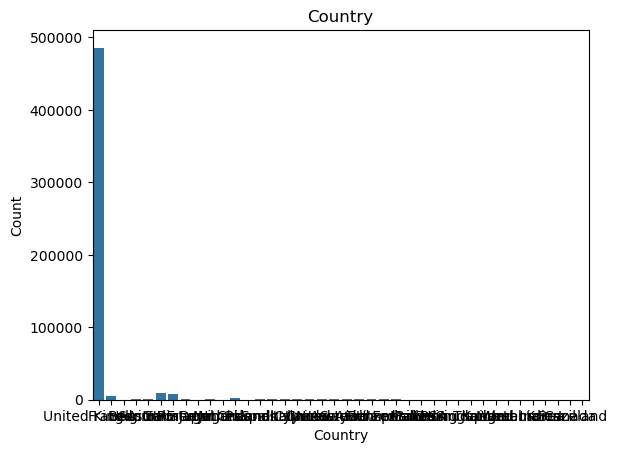

In [25]:
sns.countplot(x = "Country", data = df)
plt.title("Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

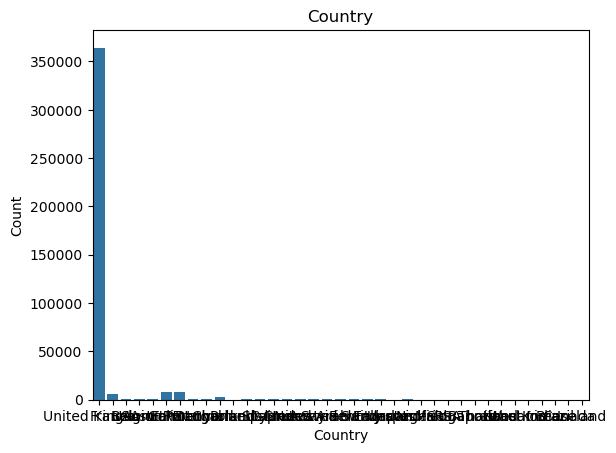

In [314]:
sns.countplot(x = "Country", data = my_df)
plt.title("Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

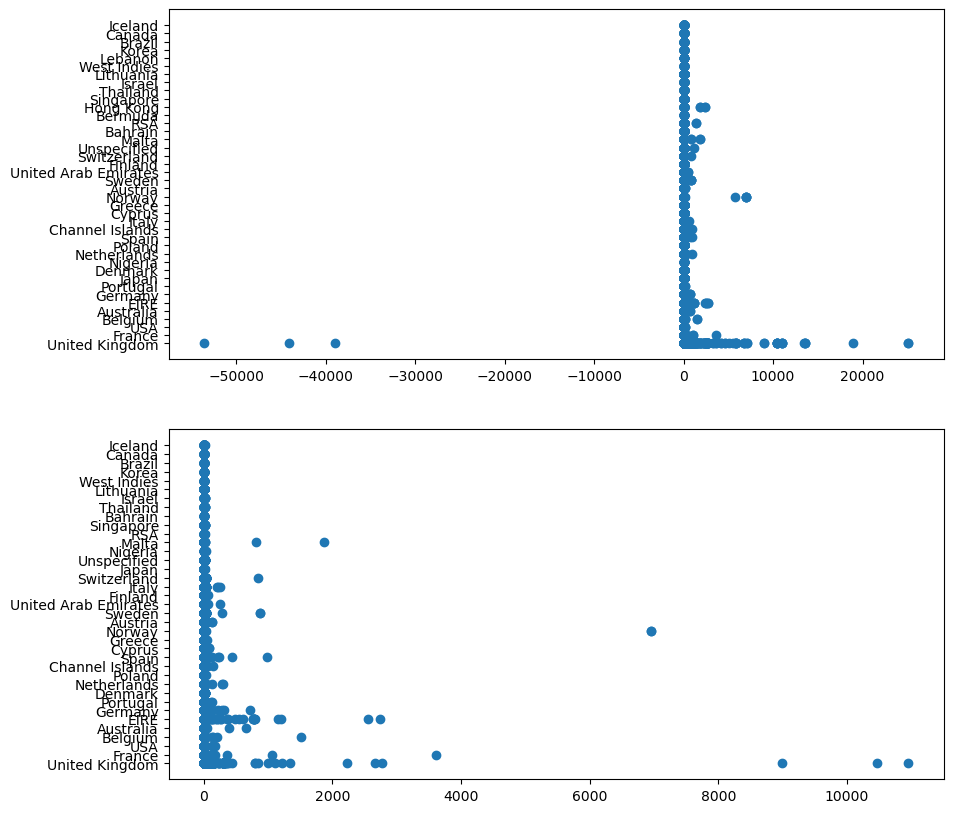

In [35]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.scatter(x = "Price", y = "Country", data = df)
ax2.scatter(x = "Price", y = "Country", data = my_df)

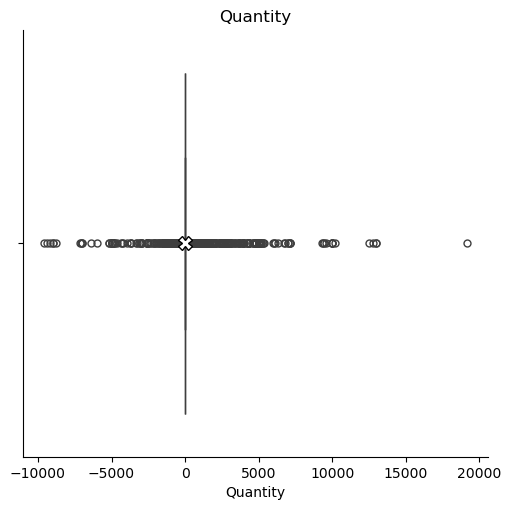

In [321]:
sns.catplot(x="Quantity", data = df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Quantity")
plt.xlabel("Quantity")
plt.show()

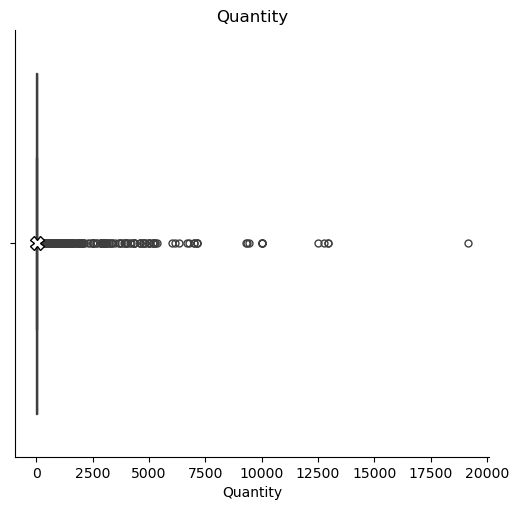

In [322]:
sns.catplot(x="Quantity", data = my_df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Quantity")
plt.xlabel("Quantity")
plt.show()

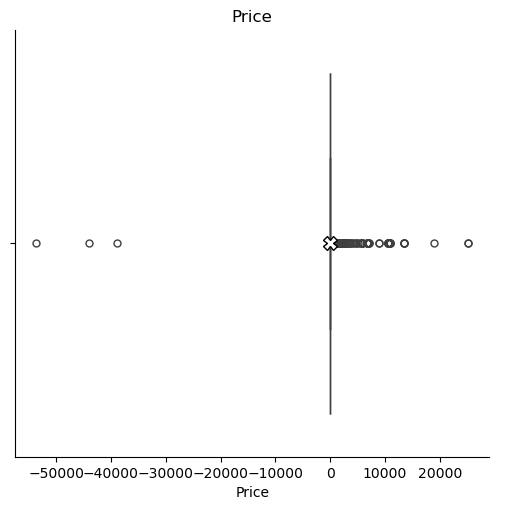

In [55]:
sns.catplot(x="Price", data = df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Price")
plt.xlabel("Price")
plt.show()

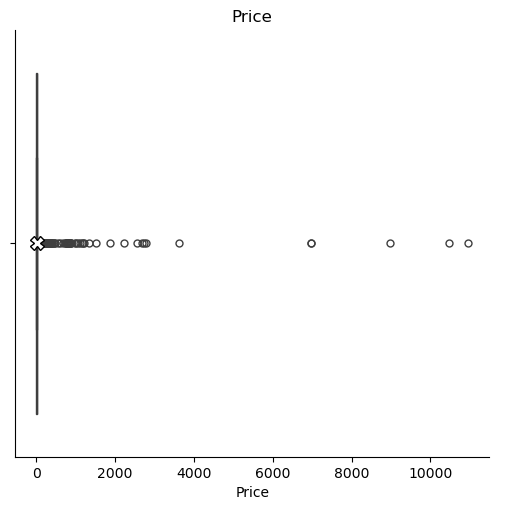

In [325]:
sns.catplot(x="Price", data = my_df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Price")
plt.xlabel("Price")
plt.show()

In [17]:
#x = ["Country", "Country"] # it wont allow Price and other be carefull

#for i in x:
 #   sns.histplot(x=i, data = df)
 #   plt.show()

In [328]:
my_df.shape

(400947, 11)

In [364]:
my_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Revenue,TotalRevenue,OrderSize
count,400947.000000,400947,400947.000000,400947.000000,400947.000000,400947.000000,400947.000000
mean,13.768523,2010-07-01 04:56:11.466452992,3.305571,15361.454639,21.943633,11388.911194,423.717424
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000,0.000000,1.000000
25%,2.000000,2010-03-26 13:13:00,1.250000,13985.000000,5.000000,1160.410000,125.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000,12.500000,2610.910000,226.000000
75%,12.000000,2010-10-14 13:57:00,3.750000,16805.000000,19.500000,6493.140000,405.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000,349164.350000,87167.000000
std,97.639816,NaN,35.046376,1680.669487,77.755308,33207.089138,1795.219618


## 4. Create the following features:

## Revenue

In [45]:
my_df["Revenue"] = my_df["Price"] * my_df["Quantity"]
my_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
# my_df = my_df.drop('Revenue', axis='columns') # for cleaning

## DayOfWeek: to analyze sales trends by weekdays.

In [47]:
def get_dayofweek(date):
    return date.strftime("%u")
    
my_df["DayOfWeek"] = my_df["InvoiceDate"].transform(get_dayofweek)

In [241]:
my_df[my_df["Invoice"] == 489434]["InvoiceDate"]

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
5   2009-12-01 07:45:00
6   2009-12-01 07:45:00
7   2009-12-01 07:45:00
Name: InvoiceDate, dtype: datetime64[ns]

In [267]:
my_df["DayOfWeek"].value_counts()

DayOfWeek
4    81638
7    73559
2    70325
3    67618
1    63470
5    50685
6      400
Name: count, dtype: int64

In [269]:
my_df["DayOfWeek"].nunique()

7

In [253]:
my_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,TotalRevenue,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2017.20,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2017.20,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2017.20,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2017.20,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2017.20,2
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,756.51,4
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,756.51,4
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,756.51,4
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,756.51,4


## TotalRevenue for each CustomerID

In [213]:
#my_df.groupby("Customer ID")["Revenue"].sum().sort_values(ascending=True).head(20) # to find out if the match is correct

In [215]:
#my_df[my_df["Customer ID"] == 13144.0]  # 24.40,  it WORKS

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,TotalRevenue
371395,525233,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2010-10-04 14:14:00,2.55,13144.0,United Kingdom,5.1,24.4
371396,525233,82494L,WOODEN FRAME ANTIQUE WHITE,4,2010-10-04 14:14:00,2.95,13144.0,United Kingdom,11.8,24.4
371397,525233,85166B,BLACK METAL BAROQUE PHOTO FRAME,2,2010-10-04 14:14:00,3.75,13144.0,United Kingdom,7.5,24.4


In [49]:
def get_sum(group):
    return group.sum()

my_df["TotalRevenue"] = my_df.groupby('Customer ID')["Revenue"].transform(get_sum)

#my_df['TotalRevenue'] = my_df.apply(lambda row: row['Customer ID'] + row['Revenue'], axis=1)  # this might be the same but with lambda

In [344]:
# my_df = my_df.drop('TotalRevenue', axis='columns') # for cleaning

In [217]:
my_df[my_df["Customer ID"] == 17530.0]["Revenue"].sum()  

756.51

In [368]:
my_df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2,2017.20,166
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2,2017.20,166
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2,2017.20,166
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2,2017.20,166
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2,2017.20,166
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.60,2,2017.20,166
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2,2017.20,166
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50,2,2017.20,166
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,2,2017.20,60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.00,2,2017.20,60


## Most popular product based on Revenue.

In [291]:
# not sure how to intepret the most popular product base on Revenue.
# is it the MOST popular item, as in only one?
# is it the most popular item based on a given Revenue interval? The issue is that the Revenue is based upon Price and Quantity

In [375]:
my_df.groupby("StockCode")["Revenue"].sum().sort_values(ascending=False) # what the hell is StockCode "M"?

StockCode
85123A    151339.160
22423     143727.600
M          98531.990
85099B     85257.450
84879      70291.030
             ...    
79151B         0.420
84205C         0.380
84206C         0.380
35930          0.380
PADS           0.014
Name: Revenue, Length: 4017, dtype: float64

In [393]:
my_df[my_df["StockCode"] == "85123A"]["Description"].head(1) # the item that has produced the most Revenue: 151339.160 ~ 151k

102    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [385]:
my_df[my_df["StockCode"] == "85123A"].describe()

,Quantity,InvoiceDate,Price,Customer ID,Revenue,TotalRevenue,OrderSize
count,3107.000000,3107,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000
mean,18.285806,2010-06-15 06:38:28.870292992,2.854422,15538.452848,48.709096,9983.194881,296.092050
min,1.000000,2009-12-01 09:46:00,1.900000,12391.000000,2.950000,30.300000,1.000000
25%,5.000000,2010-03-08 13:20:30,2.950000,14209.000000,14.750000,1190.410000,100.000000
50%,6.000000,2010-06-15 13:40:00,2.950000,15601.000000,17.700000,2699.480000,174.000000
75%,18.000000,2010-09-28 16:37:30,2.950000,16931.000000,53.100000,6450.880000,303.500000
max,936.000000,2010-12-09 18:09:00,3.240000,18283.000000,2386.800000,349164.350000,25018.000000
std,45.390330,NaN,0.172225,1604.425409,115.070938,27532.421038,692.371236


## Ordersize by summing Quantity for each InvoiceNo

In [51]:
def order_size(invoice): # for each invoice, sum quantity
    return invoice.sum()
    
my_df["OrderSize"] = my_df.groupby("Invoice")["Quantity"].transform(order_size)

In [366]:
my_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Revenue,TotalRevenue,OrderSize
count,400947.000000,400947,400947.000000,400947.000000,400947.000000,400947.000000,400947.000000
mean,13.768523,2010-07-01 04:56:11.466452992,3.305571,15361.454639,21.943633,11388.911194,423.717424
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000,0.000000,1.000000
25%,2.000000,2010-03-26 13:13:00,1.250000,13985.000000,5.000000,1160.410000,125.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000,12.500000,2610.910000,226.000000
75%,12.000000,2010-10-14 13:57:00,3.750000,16805.000000,19.500000,6493.140000,405.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000,349164.350000,87167.000000
std,97.639816,NaN,35.046376,1680.669487,77.755308,33207.089138,1795.219618


In [53]:
my_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2,2017.20,166
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2,2017.20,166
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2,2017.20,166
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2,2017.20,166
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2,2017.20,166
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,4,725.21,194
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,4,725.21,194
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,4,725.21,194
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,4,725.21,194


# 5. Apply a lambda function to segment customers into tiers based on TotalRevenue **(e.g., "High", "Medium", "Low")**

In [133]:
# @title **Example: GroupBy and Apply Multiple Aggregations**
# Create a new column 'Age_Group' using a lambda function

my_df['Customer Tier'] = my_df['TotalRevenue'].apply(lambda x: 'Low' if 500 > x  else 'Medium' if 10000 > x else 'High')
#my_df['Customer Tier'] = my_df['TotalRevenue'].apply(lambda x: 'Low' if 500 > x  else 'Medium' if 5000 > x else 'High' if 10000 > x else 'Extreme High')


# Display the first few rows
my_df[['Customer Tier', 'TotalRevenue']].sort_values(["TotalRevenue"], ascending=False).head(200)

,Customer Tier,TotalRevenue
83118,High,349164.35
175052,High,349164.35
175061,High,349164.35
175060,High,349164.35
175059,High,349164.35
...,...,...
199765,High,349164.35
519379,High,349164.35
519378,High,349164.35
519377,High,349164.35


In [135]:
my_df.groupby("Customer Tier")["Customer Tier"].value_counts()

Customer Tier
High       69148
Low        38924
Medium    292875
Name: count, dtype: int64

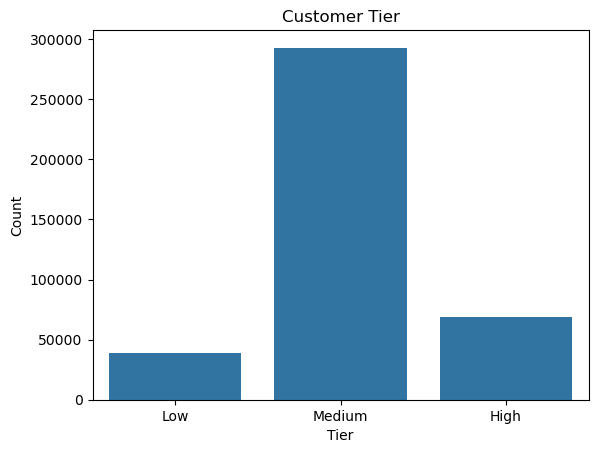

In [137]:
sns.countplot(x = "Customer Tier", data = my_df, order = ['Low', 'Medium', 'High']) # 'High', 'Extreme High'
plt.title("Customer Tier")
plt.xlabel("Tier")
plt.ylabel("Count")
plt.show()

In [59]:
my_df["TotalRevenue"].describe()

count    400947.000000
mean      11388.911194
std       33207.089138
min           0.000000
25%        1160.410000
50%        2610.910000
75%        6493.140000
max      349164.350000
Name: TotalRevenue, dtype: float64

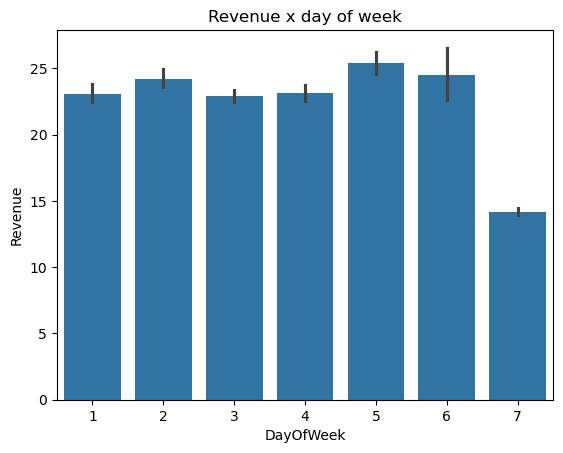

In [111]:
sns.barplot(x="DayOfWeek", y = "Revenue", data = my_df, estimator='mean', order = [1, 2, 3, 4, 5, 6, 7])
plt.title("Revenue x day of week")
plt.xlabel("DayOfWeek")
plt.ylabel("Revenue")
plt.show()

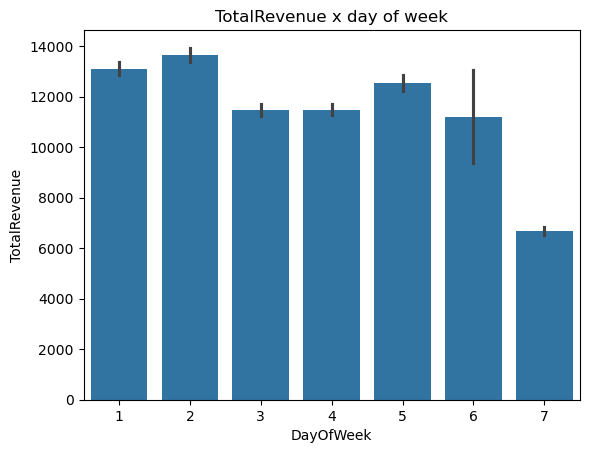

In [139]:
sns.barplot(x="DayOfWeek", y = "TotalRevenue", data = my_df, estimator='mean', order = [1, 2, 3, 4, 5, 6, 7])
plt.title("TotalRevenue x day of week")
plt.xlabel("DayOfWeek")
plt.ylabel("TotalRevenue")
plt.show()

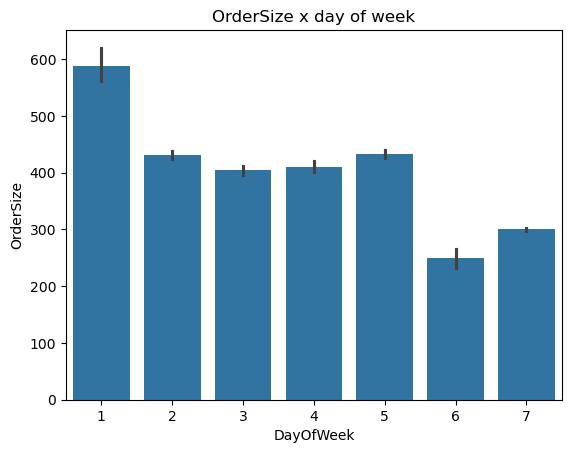

In [140]:
sns.barplot(x="DayOfWeek", y = "OrderSize", data = my_df, estimator='mean', order = [1, 2, 3, 4, 5, 6, 7])
plt.title("OrderSize x day of week")
plt.xlabel("DayOfWeek")
plt.ylabel("OrderSize")
plt.show()

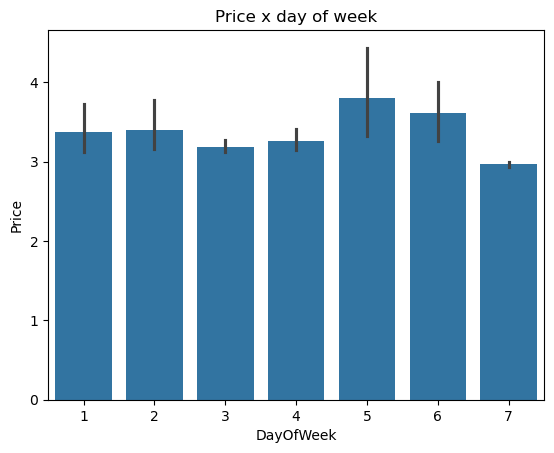

In [141]:
sns.barplot(x="DayOfWeek", y = "Price", data = my_df, estimator='mean', order = [1, 2, 3, 4, 5, 6, 7])
plt.title("Price x day of week")
plt.xlabel("DayOfWeek")
plt.ylabel("Price")
plt.show()

# 6. Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added

In [237]:
my_df[my_df["Description"].str.contains("TAGS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,Customer Tier,Tag
82,489439,21493,VINTAGE DESIGN GIFT TAGS,12,2009-12-01 09:28:00,0.85,12682.0,France,10.20,2,11745.69,219,High,No tag
308,489488,21493,VINTAGE DESIGN GIFT TAGS,6,2009-12-01 10:59:00,0.85,17238.0,United Kingdom,5.10,2,3982.66,80,Medium,No tag
769,489536,21493,VINTAGE DESIGN GIFT TAGS,2,2009-12-01 12:13:00,0.85,16393.0,United Kingdom,1.70,2,2441.61,199,Medium,No tag
1023,489547,21493,VINTAGE DESIGN GIFT TAGS,12,2009-12-01 12:30:00,0.85,13599.0,United Kingdom,10.20,2,5013.96,595,Medium,No tag
1219,489556,21493,VINTAGE DESIGN GIFT TAGS,2,2009-12-01 12:47:00,0.85,15719.0,United Kingdom,1.70,2,5165.90,174,Medium,No tag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523311,538040,22945,CHRISTMAS METAL TAGS ASSORTED,6,2010-12-09 13:08:00,0.85,16520.0,United Kingdom,5.10,4,1427.57,217,Medium,No tag
523351,538051,22945,CHRISTMAS METAL TAGS ASSORTED,12,2010-12-09 13:24:00,0.85,18041.0,United Kingdom,10.20,4,4536.29,152,Medium,No tag
523582,538069,22945,CHRISTMAS METAL TAGS ASSORTED,6,2010-12-09 14:08:00,0.85,16795.0,United Kingdom,5.10,4,2062.41,239,Medium,No tag
524311,538077,22585,PACK OF 6 BIRDY GIFT TAGS,37,2010-12-09 14:19:00,1.25,14667.0,United Kingdom,46.25,4,12418.01,394,High,No tag


In [269]:
my_df["Tag"] = my_df["Description"].apply(lambda x: "Gift" if 'GIFT TAGS' in x else "Assorted" if 'TAGS ASSORTED' in x else "No tag")

my_df[my_df["Tag"] == "Gift"].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,Customer Tier,Tag
82,489439,21493,VINTAGE DESIGN GIFT TAGS,12,2009-12-01 09:28:00,0.85,12682.0,France,10.2,2,11745.69,219,High,Gift
308,489488,21493,VINTAGE DESIGN GIFT TAGS,6,2009-12-01 10:59:00,0.85,17238.0,United Kingdom,5.1,2,3982.66,80,Medium,Gift
769,489536,21493,VINTAGE DESIGN GIFT TAGS,2,2009-12-01 12:13:00,0.85,16393.0,United Kingdom,1.7,2,2441.61,199,Medium,Gift
1023,489547,21493,VINTAGE DESIGN GIFT TAGS,12,2009-12-01 12:30:00,0.85,13599.0,United Kingdom,10.2,2,5013.96,595,Medium,Gift
1219,489556,21493,VINTAGE DESIGN GIFT TAGS,2,2009-12-01 12:47:00,0.85,15719.0,United Kingdom,1.7,2,5165.90,174,Medium,Gift


In [265]:
my_df.groupby("Tag")["Tag"].value_counts()

Tag
Assorted       160
Gift           725
No tag      400062
Name: count, dtype: int64

In [273]:
my_df[my_df["Description"].str.contains("RED")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,Customer Tier,Tag
60,489438,21411,GINGHAM HEART DOORSTOP RED,32,2009-12-01 09:24:00,2.50,18102.0,United Kingdom,80.00,2,349164.35,826,High,No tag
61,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom,168.00,2,349164.35,826,High,No tag
64,489438,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,1.90,18102.0,United Kingdom,106.40,2,349164.35,826,High,No tag
76,489439,85014B,RED/WHITE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France,17.85,2,11745.69,219,High,No tag
85,489439,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2009-12-01 09:28:00,1.65,12682.0,France,39.60,2,11745.69,219,High,No tag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525351,538168,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:23:00,3.75,14702.0,United Kingdom,7.50,4,3427.44,162,Medium,No tag
525365,538169,22072,RED RETROSPOT TEA CUP AND SAUCER,2,2010-12-09 19:28:00,3.75,13230.0,United Kingdom,7.50,4,3457.83,33,Medium,No tag
525366,538169,21527,RED RETROSPOT TRADITIONAL TEAPOT,2,2010-12-09 19:28:00,7.95,13230.0,United Kingdom,15.90,4,3457.83,33,Medium,No tag
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom,7.50,4,4266.88,133,Medium,No tag


In [279]:
my_df["Color"] = my_df["Description"].apply(lambda x: "White" if 'WHITE' in x else "Red" if 'RED' in x else "No color")

my_df[my_df["Color"] == "White"].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,Customer Tier,Tag,Color
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2,2017.20,166,Medium,No tag,White
17,489436,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-01 09:06:00,1.45,13078.0,United Kingdom,17.40,2,16904.51,193,High,No tag,White
27,489436,21333,CLASSIC WHITE FRAME,6,2009-12-01 09:06:00,2.95,13078.0,United Kingdom,17.70,2,16904.51,193,High,No tag,White
76,489439,85014B,RED/WHITE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France,17.85,2,11745.69,219,High,No tag,White
94,489441,84029E,RED WOOLLY HOTTIE WHITE HEART.,36,2009-12-01 09:44:00,2.95,18087.0,United Kingdom,106.20,2,10705.80,102,High,No tag,White


In [281]:
my_df.groupby("Color")["Color"].value_counts()

Color
No color    339375
Red          37623
White        23949
Name: count, dtype: int64

In [287]:
pd.crosstab(my_df['Description'],my_df['Color']).sort_values("Red")

Color,No color,Red,White
Description,,,
DOORMAT UNION JACK GUNS AND ROSES,51,0,0
PINK FLOWER FABRIC PONY,30,0,0
PINK FLOWER HANGING HEART,14,0,0
PINK FLOWERS CHILDS UMBRELLA,5,0,0
PINK FLOWERS RABBIT EASTER,8,0,0
...,...,...,...
SET/5 RED SPOTTY LID GLASS BOWLS,0,799,0
JUMBO SHOPPER VINTAGE RED PAISLEY,0,930,0
RED HANGING HEART T-LIGHT HOLDER,0,1013,0


# 7. Wrap all of the above into an ETL pipeline.

In [305]:
 def get_sum(group):
    return group.sum()

def get_dayofweek(date):
    return date.strftime("%u")

def order_size(invoice): 
    return invoice.sum()

# Extract, Transform, Load: ETL
def extract(dataset_path):
    file_path = dataset_path
    df = pd.read_excel(file_path)

    return df

def transform(df):
    # Clean
    temp = df.copy()

    temp = temp.dropna() # drop all Nan values
    
    temp = temp.loc[df["Quantity"] > 0]
    temp = temp.loc[df["Price"] >= 0]
    
    # Removing duplicates
    temp = temp.drop_duplicates(keep="first")

    # Add features
    temp["Revenue"] = temp["Price"] * my_df["Quantity"]  
    temp["TotalRevenue"] = temp.groupby('Customer ID')["Revenue"].transform(get_sum)
    temp["DayOfWeek"] = temp["InvoiceDate"].transform(get_dayofweek)
    temp["OrderSize"] = temp.groupby("Invoice")["Quantity"].transform(order_size)

    temp['Customer Tier'] = temp['TotalRevenue'].apply(lambda x: 'Low' if 500 > x  else 'Medium' if 10000 > x else 'High')
    temp["Tag"] = temp["Description"].apply(lambda x: "Gift" if 'GIFT TAGS' in x else "Assorted" if 'TAGS ASSORTED' in x else "No tag")

    return temp
    
def load(df, output_path): # I am utterly confused why this is called load when it saves to a file
   #df.to_csv(output_path, index=False)
    print("Data saved")
    return df

def ETL(dataset_path, output_path):
    df = extract(dataset_path)
    df_transformed = transform(df)
    df_loaded = load(df_transformed, output_path)

    return df_loaded

In [307]:
dataset_path = "C:/Users/Bobby/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1/online_retail_II.xlsx"
output_path = "define a path"

my_df2 = ETL(dataset_path, output_path)
my_df2.head()

Data saved


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,TotalRevenue,DayOfWeek,OrderSize,Customer Tier,Tag
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2017.2,2,166,Medium,No tag
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2017.2,2,166,Medium,No tag
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2017.2,2,166,Medium,No tag
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2017.2,2,166,Medium,No tag
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2017.2,2,166,Medium,No tag
